<a href="https://colab.research.google.com/github/priyaduseja/Laptop-Price-Prediction/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import sklearn
import keras
import statsmodels


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Your task is to define and train a machine learning model for predicting the price of a laptop ('buynow_price' column in the dataset) based on its attributes. When testing and comparing your models, aim to minimise the RMSE measure.

Data description: The dataset has already been randomly divided into training, validation and test sets. It is stored in 3 files: 'train_dataset.json', 'val_dataset.json' and 'test_dataset.json'. Each file is json saves in 'orient='columns' format

In [ ]:
train = pd.read_json("/content/drive/MyDrive/Project - Laptop Price Prediction Dataset/train_dataset.json")
test = pd.read_json(r"/content/drive/MyDrive/Project - Laptop Price Prediction Dataset/test_dataset.json")
validation = pd.read_json(r"/content/drive/MyDrive/Project - Laptop Price Prediction Dataset/val_dataset.json")

In [ ]:
train.columns

Index(['graphic card type', 'communications', 'resolution (px)', 'CPU cores',
       'RAM size', 'operating system', 'drive type', 'input devices',
       'multimedia', 'RAM type', 'CPU clock speed (GHz)', 'CPU model', 'state',
       'drive memory size (GB)', 'warranty', 'screen size', 'buynow_price'],
      dtype='object')

In [ ]:
test.columns

Index(['graphic card type', 'communications', 'resolution (px)', 'CPU cores',
       'RAM size', 'operating system', 'drive type', 'input devices',
       'multimedia', 'RAM type', 'CPU clock speed (GHz)', 'CPU model', 'state',
       'drive memory size (GB)', 'warranty', 'screen size', 'buynow_price'],
      dtype='object')

In [ ]:
validation.columns

Index(['graphic card type', 'communications', 'resolution (px)', 'CPU cores',
       'RAM size', 'operating system', 'drive type', 'input devices',
       'multimedia', 'RAM type', 'CPU clock speed (GHz)', 'CPU model', 'state',
       'drive memory size (GB)', 'warranty', 'screen size', 'buynow_price'],
      dtype='object')

In [ ]:
df = pd.concat([train, validation, test], axis=0)
df.head()

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [ ]:
df.shape

(6109, 17)

In [ ]:
# Look at the unique values for each column except for those formatted as list
for col in df.columns.to_list():
    if type(df[col][0]) != list:
        print(col, df[col].unique())
        print('-------------------')

graphic card type ['dedicated graphics' None 'integrated graphics']
-------------------
resolution (px) ['1920 x 1080' '1366 x 768' None '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']
-------------------
CPU cores ['4' '2' 'not applicable' '3' '1' '8' '6']
-------------------
RAM size ['32 gb' '8 gb' None '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '256 mb' '24 gb']
-------------------
drive type ['ssd + hdd' 'ssd' 'hdd' None 'emmc' 'hybrid']
-------------------
RAM type ['ddr4' 'ddr3' None 'ddr3l']
-------------------
CPU clock speed (GHz) [2.6  2.4  1.6   nan 1.2  2.   2.5  2.8  1.9  1.1  2.3  2.24 1.8  3.
 1.7  2.1  2.7  1.33 2.2  3.9  2.16 2.9  1.83 0.9  1.   1.44 1.58 1.35
 3.1  0.8  3.5  1.3  1.5  1.86 3.3  1.15 1.68 1.4  2.66 2.13 1.66 1.46
 2.56 3.8  3.6  0.  ]
-------------------
CPU model ['intel core i7' None 'other CPU' 'intel core i3' 'intel core i5'
 'intel cele

In [ ]:
# state takes only one value
# drop this column since it wont affect the price
df = df.drop(columns=['state'])

In [ ]:
df.isna().sum()

graphic card type         496
communications            782
resolution (px)           608
CPU cores                   0
RAM size                  450
operating system          650
drive type                435
input devices             678
multimedia                708
RAM type                  864
CPU clock speed (GHz)     936
CPU model                 533
drive memory size (GB)    481
warranty                    0
screen size               346
buynow_price                0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
# The columns of communications, input devices and multimedia include multiple values in a cell in list format
# Not possible to represent them in its numerics in its current format
# split the values of these columns into different columns
compact_cols = ['communications', 'input devices', 'multimedia']

In [ ]:
pd.DataFrame(df['communications'].to_list())

,0,1,2,3,4,5
0,bluetooth,lan 10/100/1000 mbps,None,None,None,None
1,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
2,wi-fi,bluetooth,None,None,None,None
3,wi-fi,bluetooth,lan 10/100 mbps,None,None,None
4,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
...,...,...,...,...,...,...
6104,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6105,bluetooth,lan 10/100 mbps,None,None,None,None
6106,wi-fi,bluetooth,lan 10/100/1000 mbps,None,None,None
6107,bluetooth,lan 10/100 mbps,None,None,None,None


In [ ]:
# Get the unique values of each features in our predefined lists
# and convert them to new feature names
def get_unique_vals(col_name):
  col_df = pd.DataFrame(df[col_name].to_list())
  unique_vals = list()
  for col in col_df.columns.to_list():
    unique_vals += [val for val in list(col_df[col].unique()) if (val not in unique_vals and val is not None)]
  return unique_vals

In [ ]:
compact_dict = {col: [] for col in compact_cols}
# apply get_unique_vals to all compact_cols
# search through the dataframe and add a feature to unique_vals list when it is not included before
for col in compact_cols:
  compact_dict[col] = get_unique_vals(col)

In [ ]:
compact_dict

{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers']}

In [ ]:
# transform string value to integer y excluding gb and mb
df['RAM size'] = df['RAM size'].str.replace(' gb', '', regex=True)
# when regex = False, replace requires exact match
df['RAM size'] = df['RAM size'].str.replace('256 mb', '0.256', regex= False)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,"15"" - 15.9""",5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,"17"" - 17.9""",2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,"17"" - 17.9""",3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,"15"" - 15.9""",5589.00


In [ ]:
df['screen size'] = df['screen size'].apply(lambda x: int(str(x)[:2]))
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00


In [ ]:
# split resolution column into two columns of integers resolution_x and resolution_y
# as 1200 X 800 would have 1200 in the first column and 800 in the second column
df['resolution_x'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[0]).astype(int)
df['resolution_y'] = df['resolution (px)'].apply(lambda x: x.split(' x ')[1]).astype(int)
df

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price,resolution_x,resolution_y
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,17,4999.00,1920,1080
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,15,2649.00,1366,768
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,12,4499.00,2560,1440
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,15,2099.00,1366,768
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,17,2699.00,1920,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,500.0,producer warranty,15,5599.00,1920,1080
2748,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1600 x 900,4,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.2,intel core i7,1000.0,seller warranty,17,2925.36,1600,900
2072,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1120.0,producer warranty,17,3799.00,1920,1080
4741,dedicated graphics,"[bluetooth, lan 10/100 mbps]",1920 x 1080,4,12,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.8,intel core i7,1256.0,producer warranty,15,5589.00,1920,1080


In [ ]:
# resolution (px) is diided into resolution_x and resolution_y
# drop resolution (px)
df = df.drop(columns=['resolution (px)'])

In [ ]:
df.dtypes

graphic card type          object
communications             object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
drive memory size (GB)    float64
warranty                   object
screen size                 int64
buynow_price              float64
resolution_x                int64
resolution_y                int64
dtype: object

In [ ]:
# put all numerical columns together
numerical_cols = ['CPU cores', 'RAM size', 'CPU clock speed (GHz)', 'drive memory size (GB)', 'screen size', 'resolution_x', 'resolution_y']
numerical_df = df[numerical_cols].astype(float)
numerical_df

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,resolution_y
7233,4.0,32.0,2.6,1250.0,17.0,1920.0,1080.0
5845,4.0,8.0,2.4,256.0,15.0,1366.0,768.0
5897,4.0,8.0,1.2,256.0,12.0,2560.0,1440.0
4870,2.0,8.0,2.0,1000.0,15.0,1366.0,768.0
2498,4.0,8.0,2.4,1000.0,17.0,1920.0,1080.0
...,...,...,...,...,...,...,...
9211,4.0,32.0,2.8,500.0,15.0,1920.0,1080.0
2748,4.0,8.0,2.2,1000.0,17.0,1600.0,900.0
2072,4.0,8.0,2.6,1120.0,17.0,1920.0,1080.0
4741,4.0,12.0,2.8,1256.0,15.0,1920.0,1080.0


In [ ]:
# use get_dummies() from pandas libraries to convert operating system column as categories
dummies_df = df['operating system'].str.join('|').str.get_dummies()
dummies_df

,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,windows 8.1 professional 64-bit
7233,1,0,0,0,0,0,0,0,0,0,0
5845,0,0,1,0,0,0,0,0,0,0,0
5897,0,0,1,0,0,0,0,0,0,0,0
4870,0,0,1,0,0,0,0,0,0,0,0
2498,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,0
2748,0,0,1,0,0,0,0,0,0,0,0
2072,1,0,0,0,0,0,0,0,0,0,0
4741,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# apply same logic to other categorical variables
dummy_cols = ['drive type', 'CPU model', 'RAM type']
for col in dummy_cols:
  col_dummies_df = df[col].str.get_dummies()
  dummies_df = pd.concat([dummies_df, col_dummies_df], axis=1)
dummies_df


,no system,other,windows 10 home,windows 10 professional,windows 7 home 64-bit,windows 7 professional 32-bit,windows 7 professional 64-bit,windows 8.1 home 32-bit,windows 8.1 home 64-bit,windows 8.1 professional 32-bit,...,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU,ddr3,ddr3l,ddr4
7233,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5845,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5897,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4870,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2498,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2748,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2072,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4741,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# check remining columns
label_col = ['buynow_price']
categorical_columns = [ col for col in df.columns.to_list() if col not in compact_cols + label_col + numerical_cols + dummy_cols + ['operating system']]
categorical_columns

['graphic card type', 'warranty']

In [ ]:
# endcode them
categorical_df = pd.get_dummies(df[categorical_columns]).astype(int)
categorical_df

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty
7233,1,0,1,0
5845,1,0,0,1
5897,0,1,1,0
4870,0,1,1,0
2498,1,0,1,0
...,...,...,...,...
9211,1,0,1,0
2748,1,0,0,1
2072,1,0,1,0
4741,1,0,1,0


In [ ]:
# put unique_vals to compact_df columns
unique_cols = list()
for col in compact_cols:
  unique_cols += compact_dict[col]
compact_df = pd.DataFrame(columns = unique_cols, index = df.index, data = np.zeros((df.shape[0], len(unique_cols))))
compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# get the values of compact_df from original dataframe
# If the computer includes the column name as feature assign 1, otherwise 0
for col, unique_list in compact_dict.items():
  for unique in unique_list:
    compact_df[unique] = df[col].apply(lambda x: 1 if unique in x else 0)
compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,modem 3g (wwan),modem 4g (lte),keyboard,touchpad,illuminated keyboard,numeric keyboard,SD card reader,camera,microphone,speakers
7233,1,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
5845,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
5897,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4870,1,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2498,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2748,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,1,1
2072,1,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
4741,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1


In [ ]:
# concatenating all processed dataframes to put together
new_df = pd.concat([categorical_df, numerical_df, compact_df, dummies_df], axis=1)
new_df.head()

,graphic card type_dedicated graphics,graphic card type_integrated graphics,warranty_producer warranty,warranty_seller warranty,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB),screen size,resolution_x,...,intel core i3,intel core i5,intel core i7,intel core m,intel pentium dual-core,intel pentium quad-core,other CPU,ddr3,ddr3l,ddr4
7233,1,0,1,0,4.0,32.0,2.6,1250.0,17.0,1920.0,...,0,0,1,0,0,0,0,0,0,1
5845,1,0,0,1,4.0,8.0,2.4,256.0,15.0,1366.0,...,0,0,1,0,0,0,0,1,0,0
5897,0,1,1,0,4.0,8.0,1.2,256.0,12.0,2560.0,...,0,0,0,0,0,0,1,0,0,1
4870,0,1,1,0,2.0,8.0,2.0,1000.0,15.0,1366.0,...,1,0,0,0,0,0,0,0,0,1
2498,1,0,1,0,4.0,8.0,2.4,1000.0,17.0,1920.0,...,0,0,1,0,0,0,0,1,0,0


###**Multicollinearity check**

Multicollinearity i a potential problem for the regression task. We will check it through Variance Inflation Factor (VIF). We will eliminate all features that have a VIF score above 20. For each iteration, we will drop only one feature, since when the feature set is changed VIF scores also change.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# compute VIF score with variance_inflation_factor
def compute_vif(features):
  vif_data = pd.DataFrame()
  vif_data['feature'] = features
  vif_data['VIF'] = [variance_inflation_factor(new_df[features].values, i) for i in range(len(features))]
  return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [ ]:
# apply VIF computation to all columns
features = new_df.columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,windows 7 home 64-bit,1.027793
1,windows 8.1 professional 32-bit,1.032274
2,windows 7 professional 32-bit,1.038891
3,wi-fi 802.11 a/b/g/n,1.074409
4,wi-fi 802.11 a/b/g/n/ac,1.120751
...,...,...
63,warranty_seller warranty,inf
64,warranty_producer warranty,inf
65,graphic card type_integrated graphics,inf
66,amd a8,inf


In [ ]:
# drop with highest vif score until all vif scores are under 20
multicollinearity = True
while multicollinearity:
  highest_vif_feature = vif_data['feature'].values.tolist()[-1]
  print("I will remove", highest_vif_feature)
  features.remove(highest_vif_feature)
  vif_data = compute_vif(features)
  multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove ddr4
I will remove graphic card type_dedicated graphics
I will remove warranty_producer warranty
I will remove emmc
I will remove resolution_y
I will remove intel core i5
I will remove touchpad
I will remove screen size
I will remove camera
I will remove CPU clock speed (GHz)
I will remove windows 10 home
I will remove ssd
I will remove keyboard
I will remove bluetooth
I will remove CPU cores
I will remove resolution_x


,feature,VIF
0,windows 8.1 professional 32-bit,1.004312
1,windows 7 home 64-bit,1.007773
2,intel celeron m,1.017819
3,windows 7 professional 32-bit,1.022363
4,intel core m,1.028608
5,windows 8.1 home 32-bit,1.029501
6,amd a4,1.035287
7,amd e1,1.036928
8,amd a10,1.039086
9,amd a12,1.055857


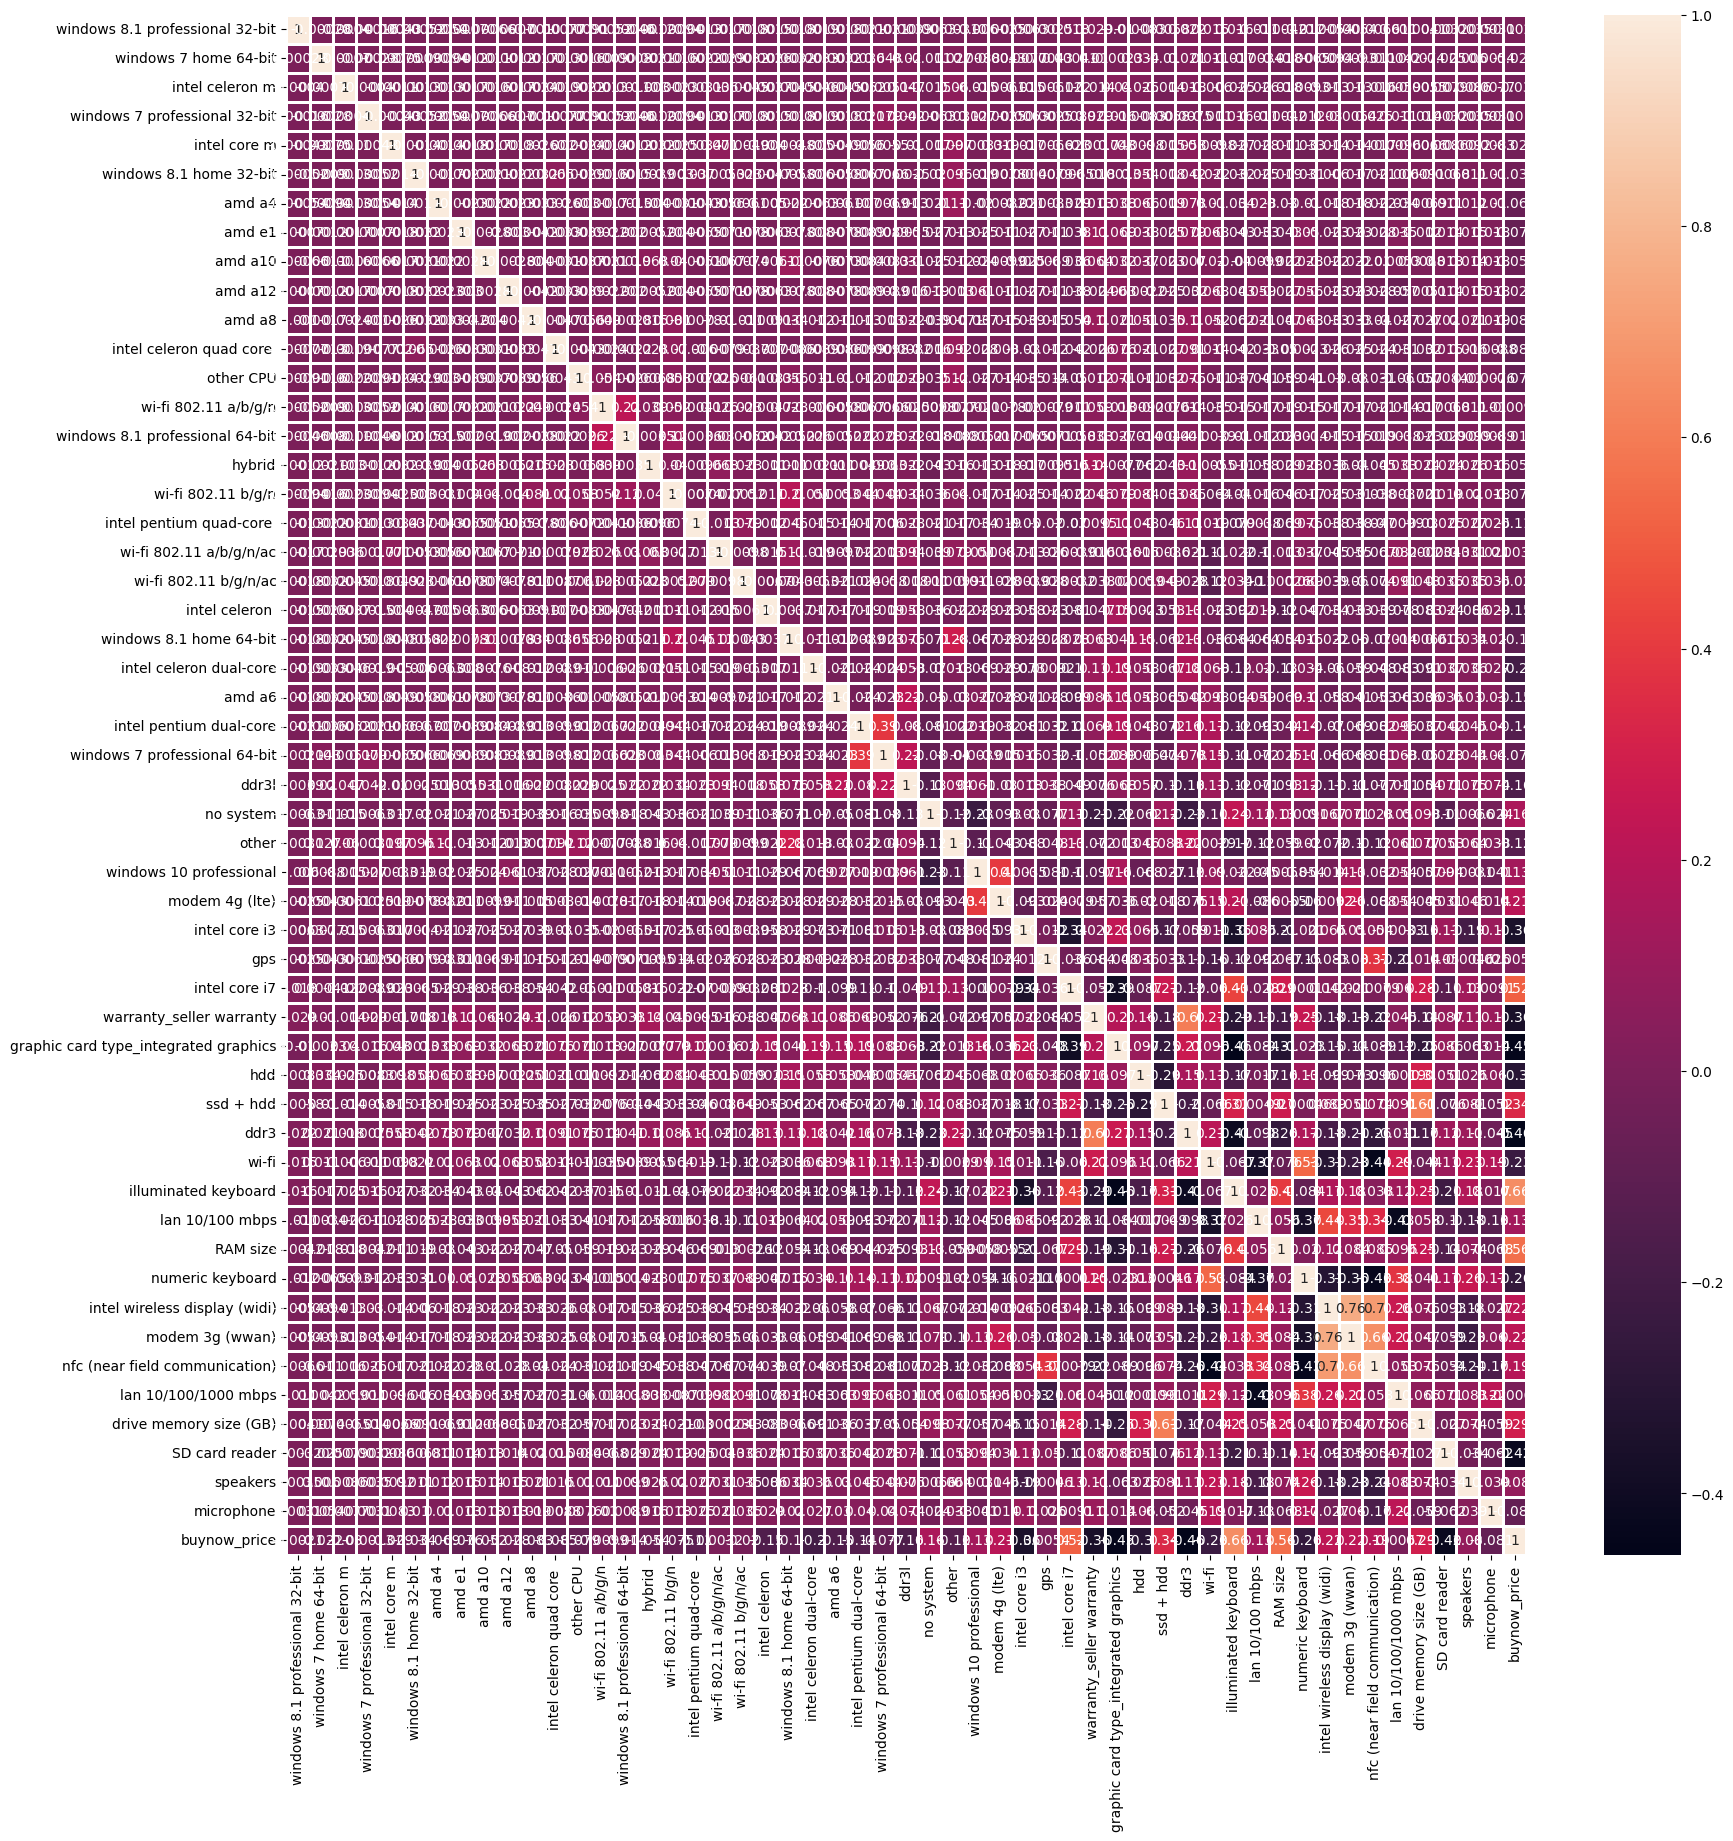

In [ ]:
# correlation matrix of multicollinearity free dataset
plt.figure(figsize=(20,20)) # width and height in inches
corr_df = pd.concat([new_df[selected_features], df[label_col]], axis=1)
sns.heatmap(corr_df.corr(), annot=True, lw=1)
plt.show()

### **Train/Val/Test Split**

In [ ]:
# use the indices of given datasets to properly separate it again as initial datasets
train_indeces = train.dropna().index
val_indeces = validation.dropna().index
test_indeces = test.dropna().index

In [ ]:
train_df = new_df.loc[train_indeces]
val_df = new_df.loc[val_indeces]
test_df = new_df.loc[test_indeces]

In [ ]:
# sklearn machine learning models expect y_train, y_test, y_val
# in the shape as (row_number, ) instead of (row_number, 1) shape, so apply .ravel()
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

In [ ]:
X_train.shape

(3694, 52)

In [ ]:
y_train.shape

(3694,)

### **Classical Machine Learning**
We will try and implement different machine learning models from Linear Regression to Ensemble Methods. We will measure root-mean-squared-error as instructed. We will scale our data with MaxAbsScaler() from sklearn, which works well with sparse datasets

Linear : 91188688392995.3
MLP : 729.3357132378999
DecisionTree : 778.9127452815708
RandomForest : 633.9695168896964
GradientBoosting : 601.758280146242
ExtraTrees : 665.5470888172354


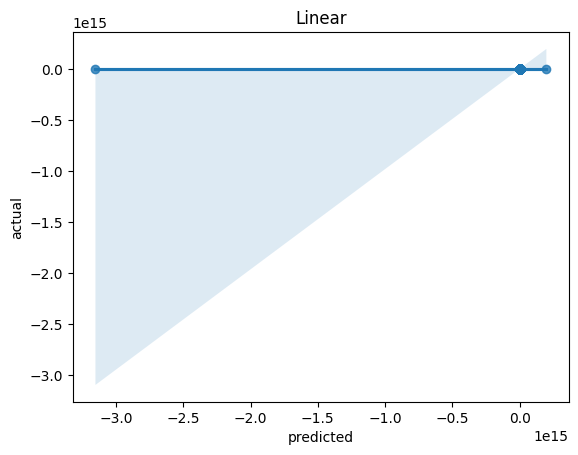

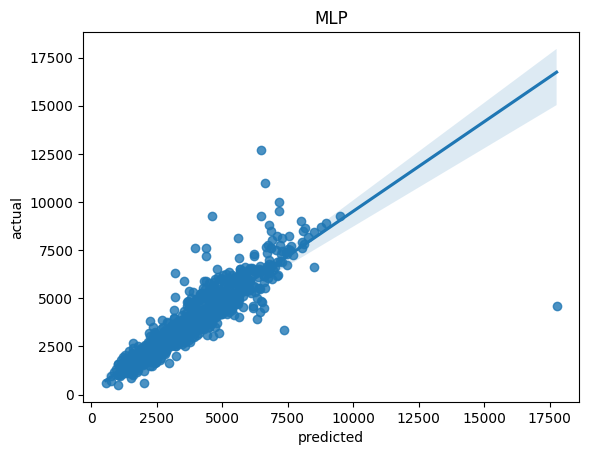

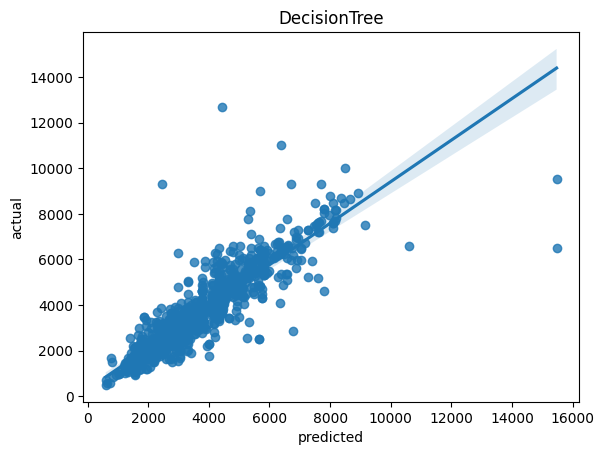

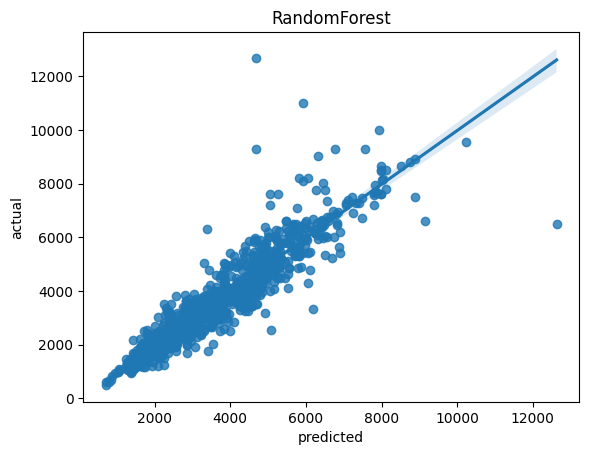

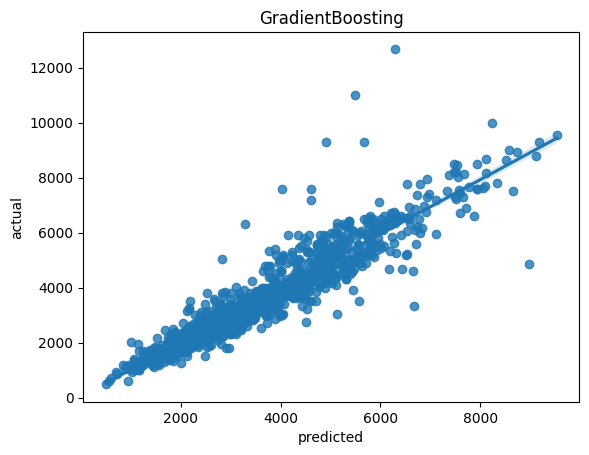

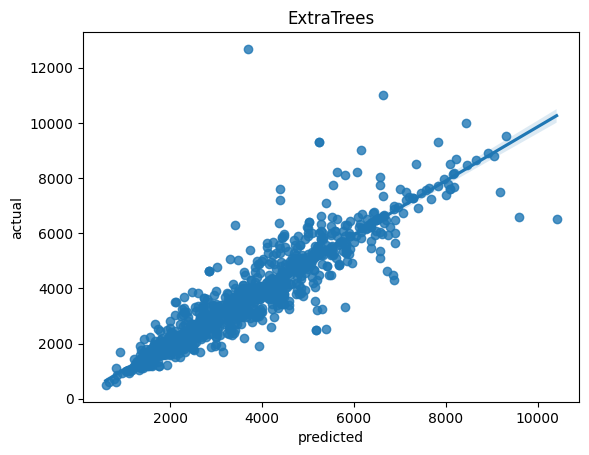

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn import tree

def rmse(y_true, y_pred):
  return mean_squared_error(y_true, y_pred, squared=False)

def regression(regressor_name, regressor):
# alternate scaler
# pipe = make_pipleline(StandardScaler(), regressor)
  pipe = make_pipeline(MaxAbsScaler(), regressor)
  pipe.fit(X_train, y_train)
  predicted = pipe.predict(X_test)
  rmse_val = rmse(y_test, predicted)
  print(regressor_name, ':', rmse_val)
  pred_df[regressor_name+'_Pred'] = predicted
  plt.figure(regressor_name)
  plt.title(regressor_name)
  plt.xlabel('predicted')
  plt.ylabel('actual')
  sns.regplot(y=y_test, x=predicted)

regressors = {
    'Linear' : LinearRegression(),
    'MLP' : MLPRegressor(random_state = 42, max_iter=500, learning_rate='constant', learning_rate_init = 0.6),
    'DecisionTree' : DecisionTreeRegressor(max_depth=15, random_state=42),
    'RandomForest' : RandomForestRegressor(random_state = 42),
    'GradientBoosting' : GradientBoostingRegressor(random_state = 42, criterion='squared_error', loss='squared_error', learning_rate=0.6, warm_start=True),
    'ExtraTrees' : ExtraTreesRegressor(n_estimators=100, random_state = 42),
}

pred_df = pd.DataFrame(columns=['Actual'])
pred_df['Actual'] = y_test

for key in regressors.keys():
  regression(key, regressors[key])

### **Voting regressor**

Voting : 579.8657906736978


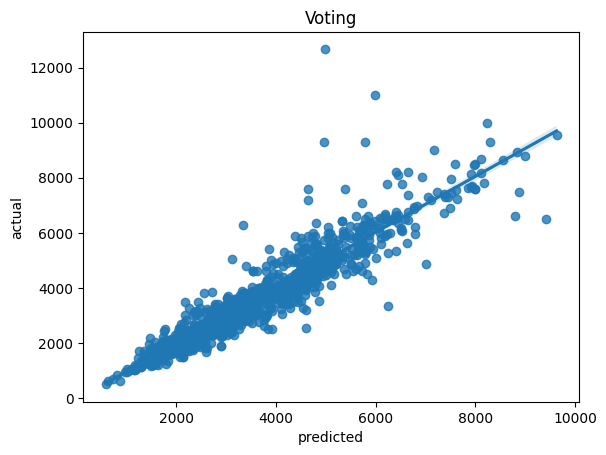

In [ ]:
from sklearn.ensemble import VotingRegressor

# classifiers
reg1 = regressors['GradientBoosting']
reg2 = regressors['ExtraTrees']
reg3 = regressors['RandomForest']

# take the highest performed three models and combine them in voting mechanism
# assign weights to their predictions and create new regressor
# it is possible to try with different weights
regression("Voting", VotingRegressor([("gb", reg1), ("et", reg2), ("rf", reg3)], weights=[0.4, 0.35, 0.25]))

In [ ]:
pred_df

,Actual,Linear_Pred,MLP_Pred,DecisionTree_Pred,RandomForest_Pred,GradientBoosting_Pred,ExtraTrees_Pred,Voting_Pred
0,2369.00,2509.871076,2505.760392,2369.000000,2336.190000,2618.542551,2369.00,2460.614521
1,2299.00,2388.406127,2275.384728,2182.333333,2254.466667,2218.507054,2299.00,2255.669488
2,5999.00,5097.097160,5049.825483,4999.000000,5003.482143,5126.262869,4999.00,5051.025683
3,1299.00,980.178852,1460.695164,1277.733333,1263.720040,1380.286530,1261.50,1309.569622
4,3329.00,6548.519343,7352.543467,4859.000000,6186.842835,6677.637694,5794.85,6245.963287
...,...,...,...,...,...,...,...,...
1195,5599.00,5801.912194,5703.250500,5809.000000,5679.553571,5848.853809,5674.00,5745.329916
1196,2925.36,3137.989052,2632.585412,2928.010000,2906.135142,2704.767699,2928.01,2833.244365
1197,3799.00,4252.333944,4195.929326,4347.366667,4462.228000,4084.755731,4478.52,4316.941292
1198,5589.00,5113.736224,5280.096801,4707.666667,4907.451667,5128.542816,4377.34,4810.349043


Voting improves the performance of the random forest. We can go ahead with this voting model as our official solution

## **Deep Learning**

Another promisin regression algorithm is artifical neural networks. We will create a small one with 4 hidden units since we have small data. We will use a scheduler to decrease the learning rate after a certain epoch number. Ans to prevent overfitting, we will use EarlyStopping.

We will make a comparison between a complex model (two hidden layers) and a bse model to see what works best.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
# set random for reproducability
tf.random.set_seed(42)

# define the error metric using keras background
def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true)))

# define learning rate scheduler
def scheduler(epoch, lr):
  if epoch < 30:
    return lr
  else:
    return lr * tf.math.exp(-0.01)

# define base model architecture
def build_and_compile_base_model():
  model = keras.Sequential([
      layers.Normalization(axis=-1),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(4, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss = root_mean_squared_error,
                optimizer= tf.keras.optimizers.Adam(0.005))
  model.build(input_shape=(None, len(selected_features)))
  return model

# define complex model architecture
def build_and_Compile_complex_model():
  model = keras.Sequential([
      layers.Normalization(axis=-1),
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.2),
      layers.Dense(8, activation='relu'),
      layers.Dense(8, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss=root_mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(0.005))
  model.build(input_shape=(None, len(selected_features)))
  return model

In [ ]:
# compile base model
dnn_model = build_and_compile_base_model()

In [ ]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 52)                105       
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                3392      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 3762 (14.70 KB)
Trainable params: 3657 (14.29 KB)
Non-trainable params: 105 (424.00 Byte)
__________________

In [ ]:
# initialise scheduler and early stopping criterion
scheduler_c = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1,
                                                  mode='auto', baseline=None, restore_best_weights=True)

# train base model
history = dnn_model.fit(
    X_train, y_train, validation_data=(X_val, y_val), epochs=400, verbose=1, callbacks = [scheduler_c, early_stopping]
)

Epoch 1/400
116/116 [==============================] - 3s 8ms/step - loss: 3069.6016 - val_loss: 2194.5413 - lr: 0.0050
Epoch 2/400
116/116 [==============================] - 1s 5ms/step - loss: 2260.9658 - val_loss: 2131.4575 - lr: 0.0050
Epoch 3/400
116/116 [==============================] - 1s 5ms/step - loss: 2179.8816 - val_loss: 2039.9121 - lr: 0.0050
Epoch 4/400
116/116 [==============================] - 1s 5ms/step - loss: 2022.6460 - val_loss: 1809.3541 - lr: 0.0050
Epoch 5/400
116/116 [==============================] - 1s 6ms/step - loss: 1686.6912 - val_loss: 1467.2706 - lr: 0.0050
Epoch 6/400
116/116 [==============================] - 1s 5ms/step - loss: 1394.2002 - val_loss: 1309.2738 - lr: 0.0050
Epoch 7/400
116/116 [==============================] - 1s 5ms/step - loss: 1333.2781 - val_loss: 1252.2981 - lr: 0.0050
Epoch 8/400
116/116 [==============================] - 0s 4ms/step - loss: 1315.5924 - val_loss: 1250.8143 - lr: 0.0050
Epoch 9/400
116/116 [===================

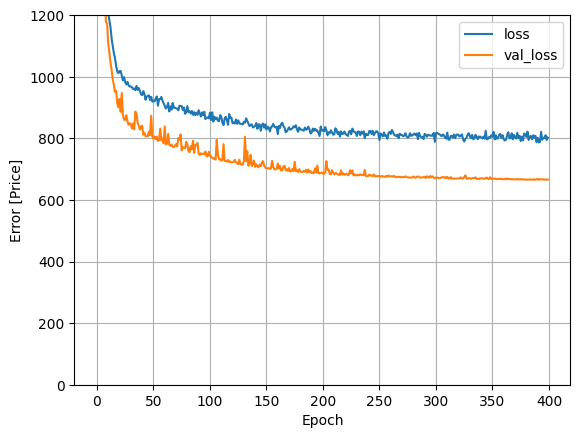

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0,1200])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Price]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
# test model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 [==============================] - 0s 3ms/step - loss: 763.7636


763.7636108398438

The base model performs worse than voting regression. Lets check the complex model

In [ ]:
# compile complex model
dnn_model = build_and_Compile_complex_model()

In [ ]:
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 52)                105       
 tion)                                                           
                                                                 
 dense_3 (Dense)             (None, 64)                3392      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                      

In [ ]:
# train complex model
history = dnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1, callbacks = [scheduler_c, early_stopping])

Epoch 1/50
116/116 [==============================] - 1s 4ms/step - loss: 2616.3333 - val_loss: 2180.3042 - lr: 0.0050
Epoch 2/50
116/116 [==============================] - 0s 3ms/step - loss: 2218.9617 - val_loss: 2066.3147 - lr: 0.0050
Epoch 3/50
116/116 [==============================] - 0s 3ms/step - loss: 1987.1949 - val_loss: 1617.0491 - lr: 0.0050
Epoch 4/50
116/116 [==============================] - 0s 3ms/step - loss: 1404.5981 - val_loss: 1269.9641 - lr: 0.0050
Epoch 5/50
116/116 [==============================] - 0s 3ms/step - loss: 1315.3586 - val_loss: 1204.8209 - lr: 0.0050
Epoch 6/50
116/116 [==============================] - 0s 3ms/step - loss: 1254.8529 - val_loss: 1151.3762 - lr: 0.0050
Epoch 7/50
116/116 [==============================] - 0s 3ms/step - loss: 1189.9867 - val_loss: 1087.6273 - lr: 0.0050
Epoch 8/50
116/116 [==============================] - 0s 3ms/step - loss: 1148.1852 - val_loss: 1040.7708 - lr: 0.0050
Epoch 9/50
116/116 [============================

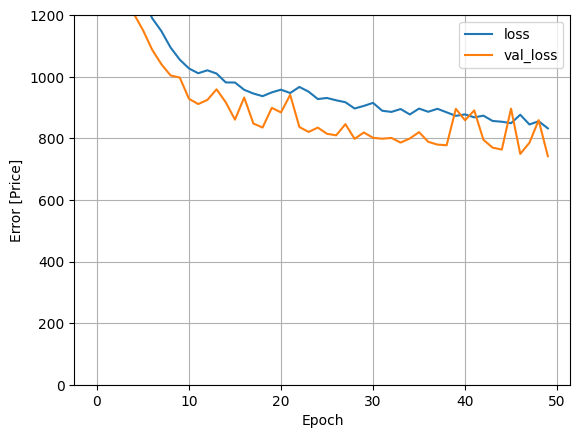

In [ ]:
plot_loss(history)

In [ ]:
# test complex model
dnn_model.evaluate(X_test, y_test, verbose=1)

38/38 [==============================] - 0s 5ms/step - loss: 824.1767


824.1766967773438

This result is slightly worse than the base model. Probably, our task is not so complex to solve with deep neural networks. So, we choose voting regressor performance as best for this dataset among all explored algorithms.

### **Feature selection**

Feature selection hurts the performance of this task. However, it is always best to present all the methods applied. We used f_regression and RandomForestRegressor.modelimportances to check feature importance. We decided on k=15, but you can change and see results for different k values

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
# Select top 25 features based on f-regression
selector = SelectKBest(f_regression, k=25)
X = new_df[selected_features].to_numpy()
y = df[label_col].to_numpy().ravel()
selector.fit(X,y)
cols = new_df[selected_features].columns[selector.get_support()].to_list()
cols

['intel celeron ',
 'intel celeron dual-core',
 'amd a6',
 'intel pentium dual-core',
 'ddr3l',
 'no system',
 'windows 10 professional',
 'modem 4g (lte)',
 'intel core i3',
 'intel core i7',
 'warranty_seller warranty',
 'graphic card type_integrated graphics',
 'hdd',
 'ssd + hdd',
 'ddr3',
 'wi-fi',
 'illuminated keyboard',
 'lan 10/100 mbps',
 'RAM size',
 'numeric keyboard',
 'intel wireless display (widi)',
 'modem 3g (wwan)',
 'nfc (near field communication)',
 'drive memory size (GB)',
 'SD card reader']

In [ ]:
X_train, X_val, X_test = train_df[cols].to_numpy(), val_df[cols].to_numpy(), test_df[cols].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest : 665.1055336524732


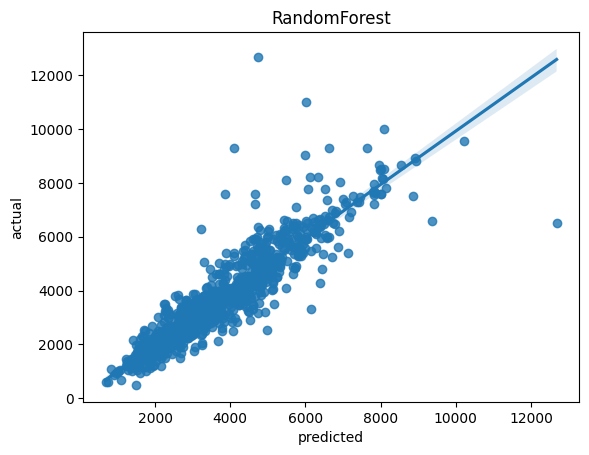

In [ ]:
regression('RandomForest', regressors['RandomForest'])

Feature: windows 8.1 professional 32-bit, Score: 4.076917423525594e-06
Feature: windows 7 home 64-bit, Score: 0.0
Feature: intel celeron m, Score: 3.3547247261603197e-05
Feature: windows 7 professional 32-bit, Score: 0.0
Feature: intel core m, Score: 4.120767750427985e-05
Feature: windows 8.1 home 32-bit, Score: 6.642166932600762e-05
Feature: amd a4, Score: 0.0003771565537999029
Feature: amd e1, Score: 0.0001418666602477293
Feature: amd a10, Score: 4.9232132864695346e-05
Feature: amd a12, Score: 0.00010815468762526774
Feature: amd a8, Score: 0.00019707734585381787
Feature: intel celeron quad core , Score: 6.016111796108128e-05
Feature: other CPU, Score: 0.0001614811780370233
Feature: wi-fi 802.11 a/b/g/n, Score: 0.00040571661621910783
Feature: windows 8.1 professional 64-bit, Score: 0.0007511242429722693
Feature: hybrid, Score: 0.0008290547935389241
Feature: wi-fi 802.11 b/g/n, Score: 0.0002200765033653287
Feature: intel pentium quad-core , Score: 0.000433679113922417
Feature: wi-fi 80

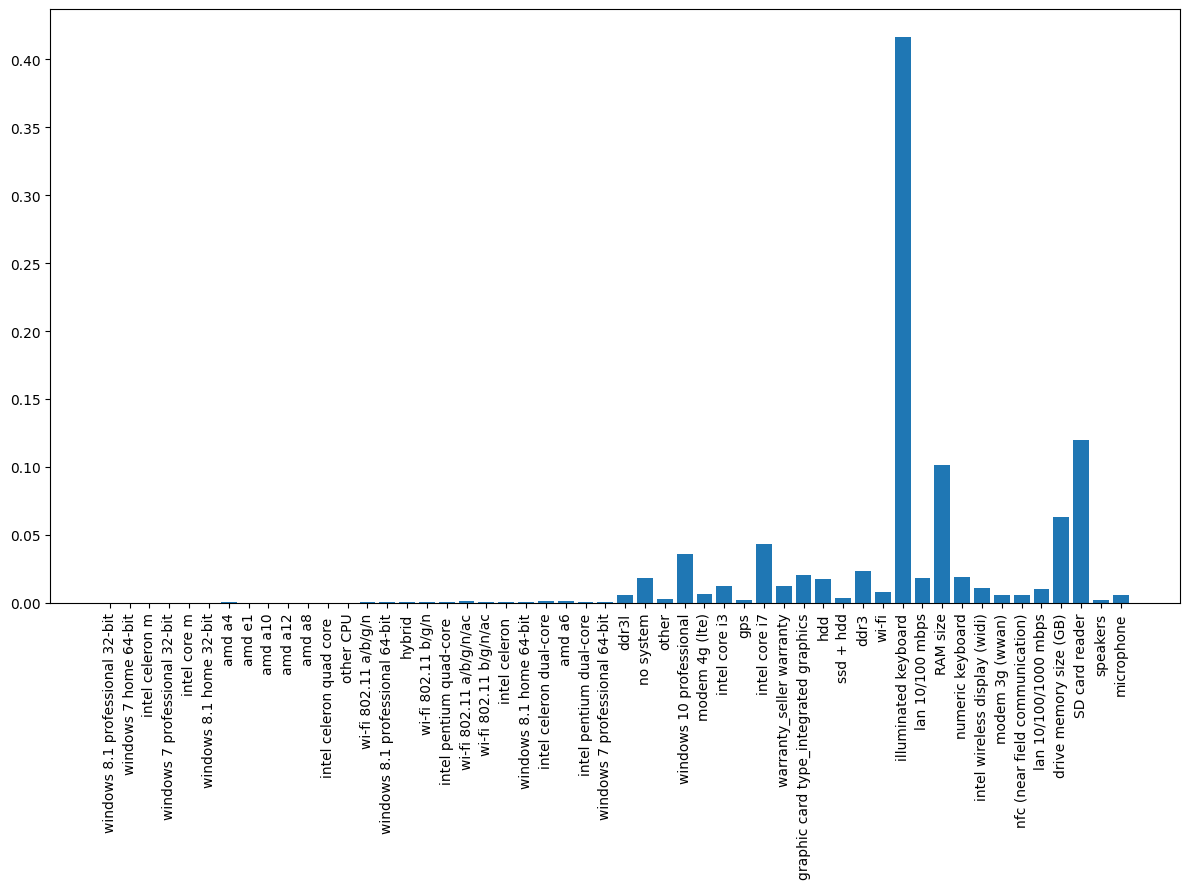

In [ ]:
X = new_df[selected_features].values
X_train, X_val, X_test = train_df[selected_features].to_numpy(), val_df[selected_features].to_numpy(), test_df[selected_features].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()
model = RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)
# fit the model
importance = model.feature_importances_
# summarize feature importance
for i, v in enumerate(importance):
  print(f"Feature: {selected_features[i]}, Score: {v}")
# plot feature importance
plt.figure(figsize=(12,9)) # width and height in inches
plt.bar(selected_features, importance)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
feats_w_highest_importance = np.array(selected_features)[importance > 0.02].tolist()
feats_w_highest_importance

['windows 10 professional',
 'intel core i7',
 'graphic card type_integrated graphics',
 'ddr3',
 'illuminated keyboard',
 'RAM size',
 'drive memory size (GB)',
 'SD card reader']

In [ ]:
X_train, X_val, X_test = train_df[feats_w_highest_importance].to_numpy(), val_df[feats_w_highest_importance].to_numpy(), test_df[feats_w_highest_importance].to_numpy()
y_train, y_val, y_test = df.loc[train_indeces][label_col].to_numpy().ravel(), df.loc[val_indeces][label_col].to_numpy().ravel(), df.loc[test_indeces][label_col].to_numpy().ravel()

RandomForest : 786.6299599302339


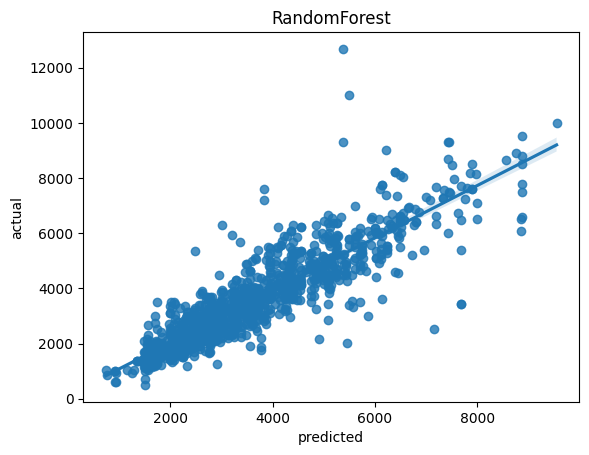

In [ ]:
regression("RandomForest", regressors['RandomForest'])

Still, the complete feature set provides better results compared to features with the highest importance